# Dim reduction exploration of extracted features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas


from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import DBSCAN


%matplotlib inline
# %matplotlib notebook

In [2]:
## Load the data

# orig_X = np.loadtxt('feature data/final_Data_20k/X_reduced.csv', delimiter=',')
# orig_Y = np.loadtxt('feature data/final_Data_20k/Y_reduced.csv', delimiter=',')
# orig_gal_id = np.loadtxt('feature data/final_Data_20k/gal_id_reduced.csv', delimiter=',')
# orig_colorby = np.loadtxt('feature data/final_Data_20k/colorby_reduced.csv', delimiter=',')

X = np.loadtxt('feature data/final_Data_20k/X_reduced.csv', delimiter=',')
Y = np.loadtxt('feature data/final_Data_20k/Y_reduced.csv', delimiter=',')
gal_id = np.loadtxt('feature data/final_Data_20k/gal_id_reduced.csv', delimiter=',')
colorby = np.loadtxt('feature data/final_Data_20k/colorby_reduced.csv', delimiter=',')


In [7]:
# remove first row!
X = X[1:,:]
Y = Y[1:,:]
gal_id = gal_id[1:]
colorby = colorby[1:]
print(X.shape)
print(Y.shape)
print(gal_id.shape)
print(colorby.shape)


(20000, 512)
(20000, 37)
(20000,)
(20000,)


In [ ]:
# Reduce data size by randomly selecting from set 

# rows,cols = orig_X.shape
# new_size = 500

# # Selects random indices over range of galaxies
# x_inds = np.random.choice(rows,new_size)

# # creates X,Y,gal_id,colorby that I'll use in analysis
# X = orig_X[x_inds];
# Y = orig_Y[x_inds];
# gal_id = orig_gal_id[x_inds];
# colorby = orig_colorby[x_inds];

# # Saves feature vector data
# df = pandas.DataFrame(data=X)
# df.to_csv("./X_reduced.csv", sep=',',index=False)

# # Saves label data
# df = pandas.DataFrame(data=Y)
# df.to_csv("./Y_reduced.csv", sep=',',index=False)

# # Saves color by data
# df = pandas.DataFrame(data=colorby)
# df.to_csv("./colorby_reduced.csv", sep=',',index=False)

# # Saves color by data
# df = pandas.DataFrame(data=gal_id)
# df.to_csv("./gal_id_reduced.csv", sep=',',index=False)

## Run t-SNE 

In [8]:
# run t-SNE

# tsne_coordsL2_2 = TSNE(n_components=2,perplexity=200,learning_rate=100,metric='euclidean',n_iter=2000).fit_transform(X)
tsne_coordsL2_2 = TSNE(n_components=2,perplexity=200,learning_rate=50,metric='euclidean',n_iter=1000).fit_transform(X)

# tsne_coordsL2_3 = TSNE(n_components=3,perplexity=40,learning_rate=50,metric='euclidean').fit_transform(X)
# tsne_coordsCheb = TSNE(n_components=2,perplexity=40,learning_rate=50,metric='chebyshev').fit_transform(X)
# tsne_coordsCosine = TSNE(n_components=2,perplexity=40,learning_rate=50,metric='cosine').fit_transform(X)

# print(tsne_coordsL2)

## Plot t-SNE results to inspect

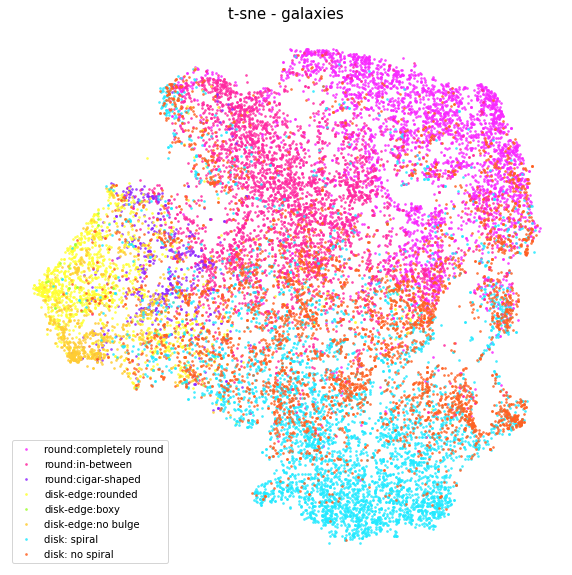

In [9]:
tsne_coordsG = tsne_coordsL2_2
# tsne_coordsG = np.load('./dim reduction data/tsne_coords.npy')

gal_classes = ['round:completely round','round:in-between','round:cigar-shaped', \
              'disk-edge:rounded','disk-edge:boxy','disk-edge:no bulge', \
              'disk: spiral','disk: no spiral']
# Original colors
# colorsG = ['#11ffeb','#ff4911','#ffbd7a', '#7a7aff', '#fd7aff', '#ffff7a']
# Colors based on larger categories - so related categories have similar colors
colorsG = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']

plt.figure(figsize = (10,10))
# plt.subplot(2,1,1)
for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
    plt.scatter(tsne_coordsG[colorby==int(i),0], tsne_coordsG[colorby==int(i),1], alpha=0.7, c=c, label=lab,s=3)
plt.legend()
plt.title('t-sne - galaxies',fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

# plt.subplot(2,1,2)
# for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
#     plt.scatter(pca_coordsG[Y==int(i),0], pca_coordsG[Y==int(i),1], alpha=0.7, c=c, label=lab)
# #plt.legend()
# plt.title('pca - galaxies',fontsize=15)
# [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

plt.show()

## Save t-SNE coordinates

In [14]:
# Save coords
# saves csv 
# df = pandas.DataFrame(data=tsne_coordsG)
# df.to_csv("./tsne_coords.csv", sep=',',index=False)
# saves in numpy format
np.save('./tsne_coords',tsne_coordsG)

## Run LDA

In [ ]:
# Linear Discriminant Analysis, imported as LDA
# http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

# Components here limited by number of classes
# LDA_coords_2 = LDA(n_components=2).fit_transform(X,colorby)
# LDA_coords_7 = LDA(n_components=7).fit_transform(X,colorby)


## Plot LDA results to inspect

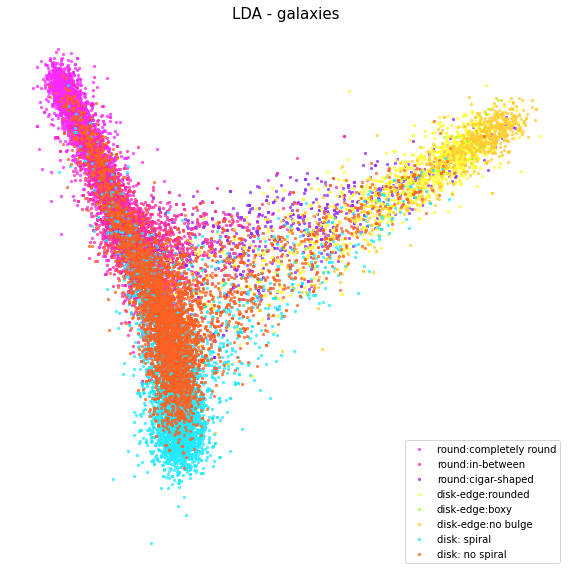

In [15]:
LDA_coords = LDA().fit_transform(X,colorby)
# print(colorby)
gal_classes = ['round:completely round','round:in-between','round:cigar-shaped', \
              'disk-edge:rounded','disk-edge:boxy','disk-edge:no bulge', \
              'disk: spiral','disk: no spiral']

# Original colors
# colorsG = ['#11ffeb','#ff4911','#ffbd7a', '#7a7aff', '#fd7aff', '#ffff7a']
# Colors based on larger categories - so related categories have similar colors
colorsG = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']

plt.figure(figsize = (10,10))
# plt.subplot(2,1,1)
for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
    plt.scatter(LDA_coords[colorby==int(i),0], LDA_coords[colorby==int(i),1], alpha=0.7, c=c, label=lab,s=5)
plt.legend()
plt.title('LDA - galaxies',fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

# plt.subplot(2,1,2)
# for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
#     plt.scatter(pca_coordsG[Y==int(i),0], pca_coordsG[Y==int(i),1], alpha=0.7, c=c, label=lab)
# #plt.legend()
# plt.title('pca - galaxies',fontsize=15)
# [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

plt.show()

## Save LDA coords

In [16]:
np.save('./LDA_coords',LDA_coords)

# tSNE Clustering exploration

## K-means

In [17]:
# K - Means 
from sklearn.cluster import KMeans

# subplot
def kMeansPlot(proj_data,clust_data,clusters,n_components,dim_reduct,): 
    km_proj = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    km_clust = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )

    X_tsne_2 = proj_data
    X_tsne_3 = clust_data

    y_km = km_proj.fit_predict(proj_data)
    y_km_clust = km_clust.fit_predict(clust_data)

    #print(y_km)
    plt.figure(figsize = (10,5))
#     colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
    colors = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']
    plt.subplot(1,2,1)
    for i in range(clusters):
        plt.scatter(proj_data[y_km_clust == i, 0],proj_data[y_km_clust == i, 1],c=colors[i],s=30)
    # Plot the centers
    if n_components == 2 and dim_reduct=='t-SNE':
        plt.plot(km_proj.cluster_centers_[:,0],km_proj.cluster_centers_[:,1],"ok",ms=10)
    plt.title("K-means {} clustered on {} dimensions".format(dim_reduct,n_components),fontsize=15)
    plt.axis("off")
    [i.set_linewidth(0.4) for i in plt.gca().spines.values()]
    
    
    # plots comparison
    gal_classes = ['round:completely round','round:in-between','round:cigar-shaped', \
              'disk-edge:rounded','disk-edge:boxy','disk-edge:no bulge', \
              'disk: spiral','disk: no spiral']
    colorsG = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']
    plt.subplot(1,2,2)
    for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
        plt.scatter(proj_data[colorby==int(i),0], proj_data[colorby==int(i),1], alpha=1, c=c, label=lab)
    plt.title("{}".format(dim_reduct),fontsize=15)
    plt.axis("off")
    plt.legend()
    [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

    
    plt.show()
      
# single plot
def kMeansPlotSingle(proj_data,clust_data,clusters,n_components,dim_reduct,title=None): 
    km_proj = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )
    km_clust = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )

    X_tsne_2 = proj_data
    X_tsne_3 = clust_data

    y_km = km_proj.fit_predict(proj_data)
    y_km_clust = km_clust.fit_predict(clust_data)

    #print(y_km)
    plt.figure(figsize = (10,10))
#     colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
    colors = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']
    for i in range(clusters):
        plt.scatter(proj_data[y_km_clust == i, 0],proj_data[y_km_clust == i, 1],c=colors[i],s=2)
    # Plot the centers
    if n_components == 2 and dim_reduct=='t-SNE':
        plt.plot(km_proj.cluster_centers_[:,0],km_proj.cluster_centers_[:,1],"ok",ms=10)
    if title:
        plt.title(title,fontsize=15)
    else:
        plt.title("K-means with {} clusters on {} ".format(clusters,dim_reduct),fontsize=15)
    plt.axis("off")
    [i.set_linewidth(0.4) for i in plt.gca().spines.values()]

    
    plt.show()
      


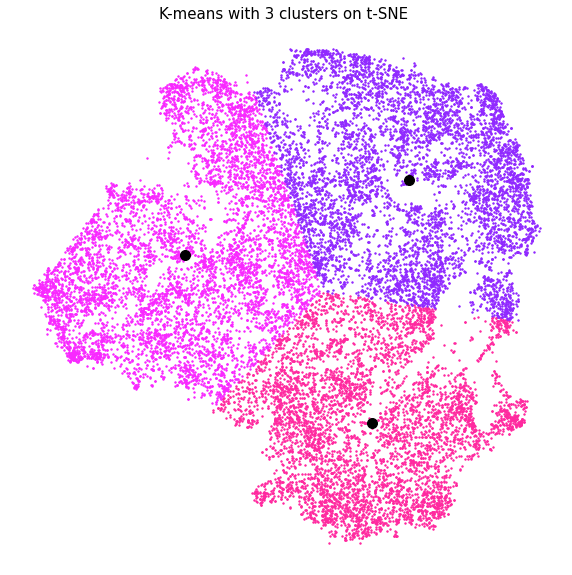

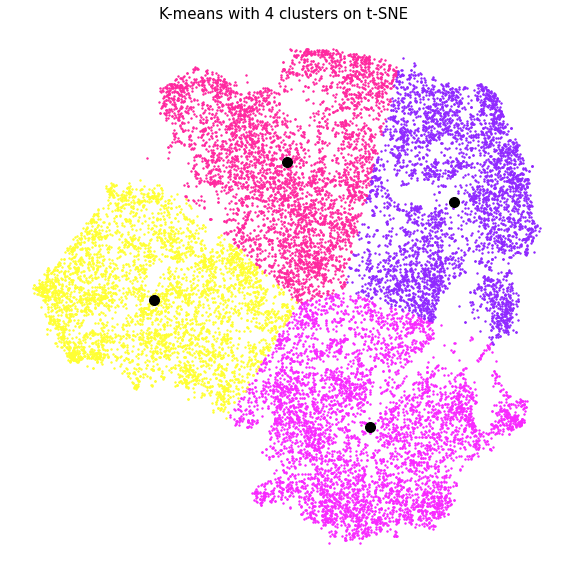

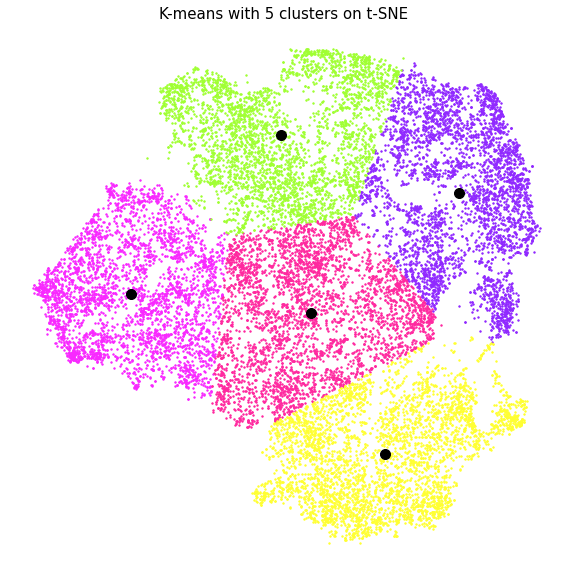

In [20]:
# kMeansPlot(tsne_coordsL2_2,tsne_coordsL2_3,5,3,'t-SNE')
# kMeansPlot(tsne_coordsL2_2,tsne_coordsL2_2,3,2,'t-SNE')
kMeansPlotSingle(tsne_coordsL2_2,tsne_coordsL2_2,3,2,'t-SNE')
kMeansPlotSingle(tsne_coordsL2_2,tsne_coordsL2_2,4,2,'t-SNE')
kMeansPlotSingle(tsne_coordsL2_2,tsne_coordsL2_2,5,2,'t-SNE')


## elbow method with k means

In [21]:
# Calculate k-means costs
def kmCost(data,n_components,dim_reduct):
    costs_km = []
    for i in range(1, 11):
        km = KMeans(
            n_clusters=i, init='k-means++',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(data)
        costs_km.append(km.inertia_)

    plt.figure(figsize = (7,5))
    plt.plot(range(1,11),costs_km,'--m',marker='o')
    plt.xlabel("centers")
    plt.ylabel("cost")
    plt.title("k-means elbow on {} with {} components".format(dim_reduct,n_components),fontsize='15')
    plt.show()

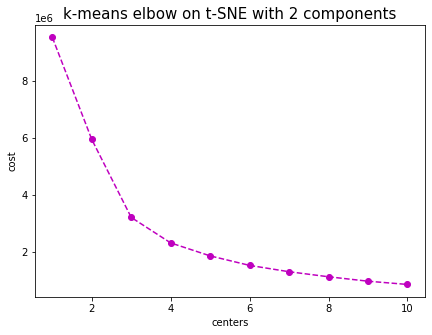

In [22]:

kmCost(tsne_coordsL2_2,2,'t-SNE')
# kmCost(tsne_coordsL2_3,3)

## Save t-sne clustering

In [23]:

def clusterOut(data,clusters):
    km_clust = KMeans(
        n_clusters=clusters, init='k-means++',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0
    )


    y_km = km_clust.fit_predict(data)
    return y_km


In [24]:
tsne_k3 = clusterOut(tsne_coordsL2_2,3)
tsne_k4 = clusterOut(tsne_coordsL2_2,4)
tsne_k5 = clusterOut(tsne_coordsL2_2,5)
tsne_k6 = clusterOut(tsne_coordsG,6)
tsne_k7 = clusterOut(tsne_coordsG,7)
tsne_k8 = clusterOut(tsne_coordsG,8)

# Save as numpy format
np.save('./tsne_k3',tsne_k3)
np.save('./tsne_k4',tsne_k4)
np.save('./tsne_k5',tsne_k5)
np.save('./tsne_k6',tsne_k6)
np.save('./tsne_k7',tsne_k7)
np.save('./tsne_k8',tsne_k8)

## DBSCAN

[0 1 3 ... 2 2 1]
number of clusters:  10


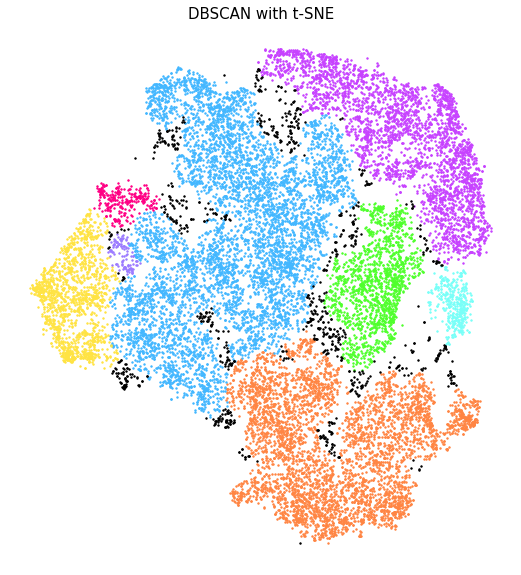

In [48]:
# DBSCAN clustering
tsne_coords = np.load('./dim reduction data/tsne_coords.npy')
tsne_db = DBSCAN(eps=2.0717,min_samples=100).fit_predict(tsne_coords)
# tsne_db = DBSCAN(eps=2.5,min_samples=50).fit_predict(X_tsne_3)
print(tsne_db)
num_clusters = len(np.unique(tsne_db))
print("number of clusters: ",num_clusters)


plt.figure(figsize = (20,10))
colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
plt.subplot(1,2,1)
for i in range(num_clusters):
    i_color = i % 8
    plt.scatter(tsne_coords[tsne_db == i, 0],tsne_coords[tsne_db == i, 1],c=colors[i_color],s=2)
plt.scatter(tsne_coords[tsne_db == -1, 0],tsne_coords[tsne_db == -1, 1],c="black",s=2)
        

plt.title("DBSCAN with t-SNE",fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]
plt.show()
    


In [49]:
# Save dbscan clustering
np.save('./tsne_db',tsne_db)

# LDA clustering exploration

(20000, 2)


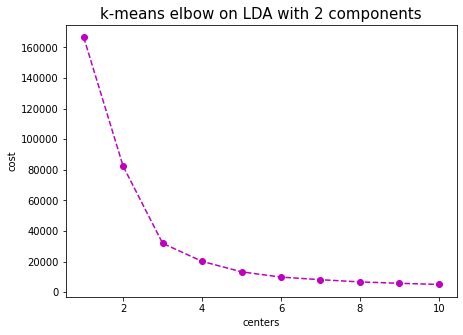

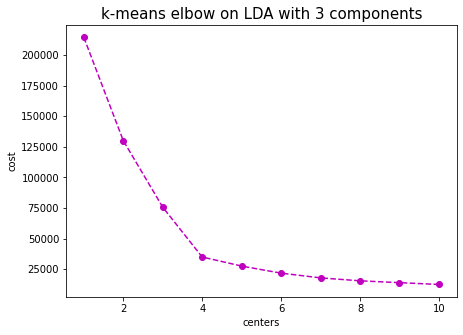

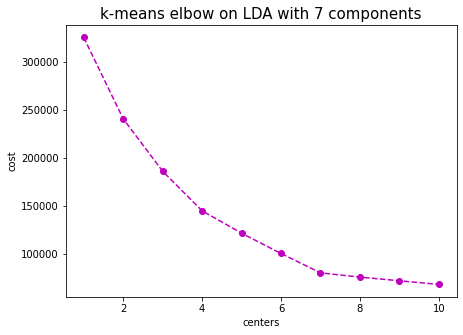

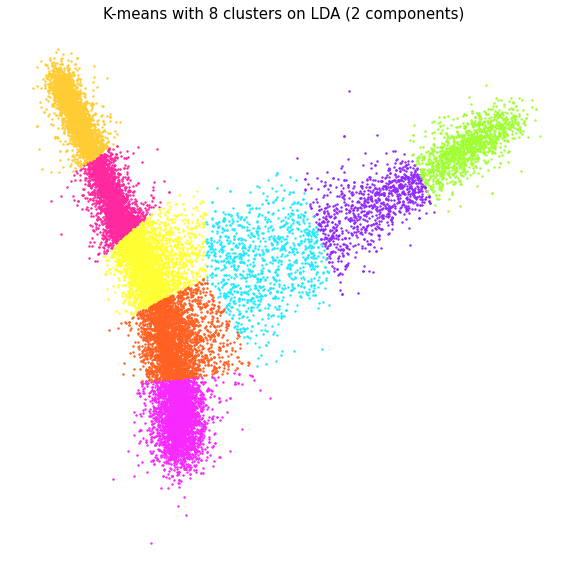

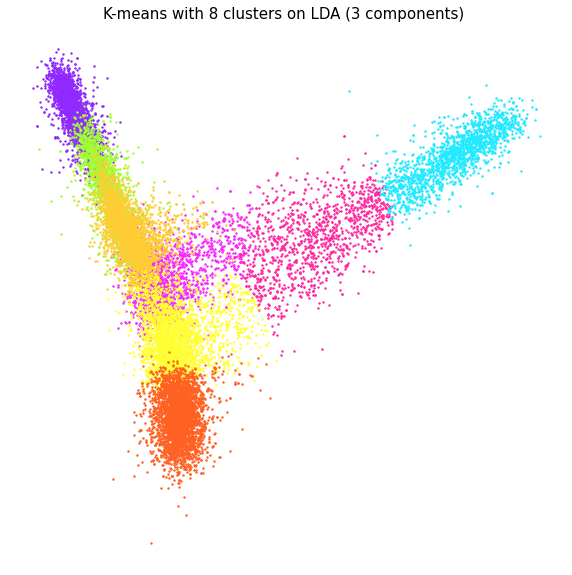

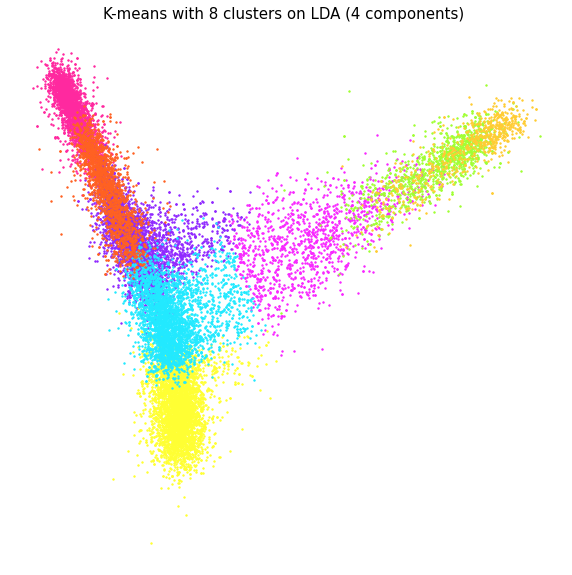

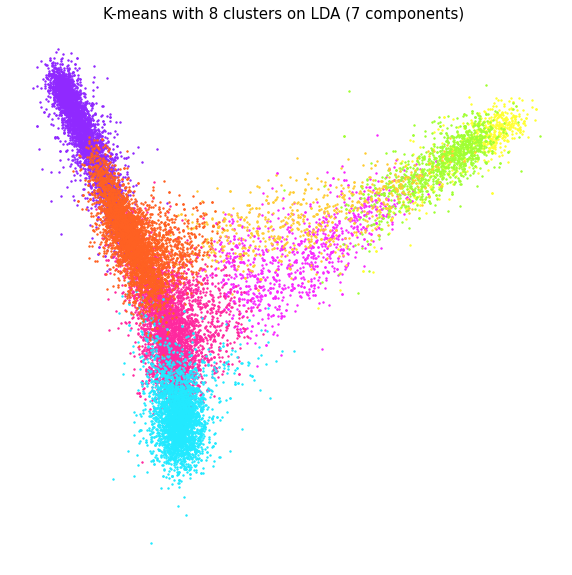

In [50]:
# Components here limited by number of classes
# LDA_coords_2 = LDA(n_components=2).fit_transform(X,colorby)
# LDA_coords_7 = LDA(n_components=7).fit_transform(X,colorby)
# kMeansPlot(tsne_coordsL2_2,tsne_coordsL2_3,5,3)

# Divide LDA into coordinates
LDA_coords2 = LDA_coords[:,:2]
LDA_coords3 = LDA_coords[:,:3]
LDA_coords4 = LDA_coords[:,:4]
print(LDA_coords2.shape)
kmCost(LDA_coords2,2,'LDA')
kmCost(LDA_coords3,3,'LDA')
kmCost(LDA_coords,7,'LDA')
kMeansPlotSingle(LDA_coords2,LDA_coords2,8,2,'LDA (2 components)')
kMeansPlotSingle(LDA_coords3,LDA_coords3,8,3,'LDA (3 components)')
kMeansPlotSingle(LDA_coords4,LDA_coords4,8,4,'LDA (4 components)')
kMeansPlotSingle(LDA_coords,LDA_coords,8,7,'LDA (7 components)')

In [51]:
# Save LDA clustering
LDA_k3 = clusterOut(LDA_coords,3)
LDA_k4 = clusterOut(LDA_coords,4)
LDA_k5 = clusterOut(LDA_coords,5)
LDA_k6 = clusterOut(LDA_coords,6)
LDA_k7 = clusterOut(LDA_coords,7)
LDA_k8 = clusterOut(LDA_coords,8)


# Save as numpy format
np.save('./LDA_k3',LDA_k3)
np.save('./LDA_k4',LDA_k4)
np.save('./LDA_k5',LDA_k5)
np.save('./LDA_k6',LDA_k6)
np.save('./LDA_k7',LDA_k7)
np.save('./LDA_k8',LDA_k8)

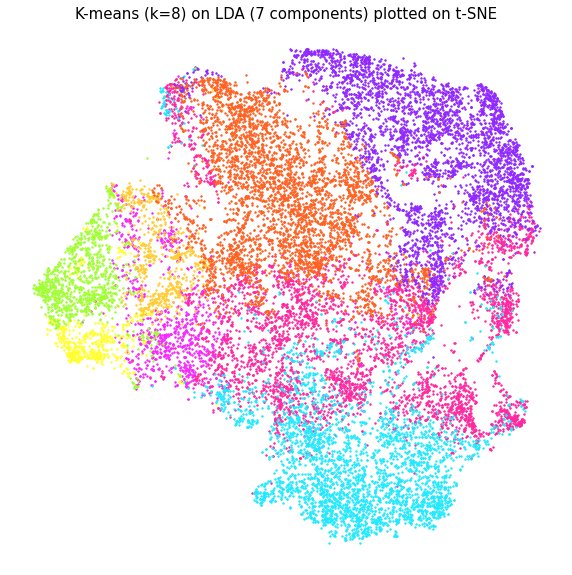

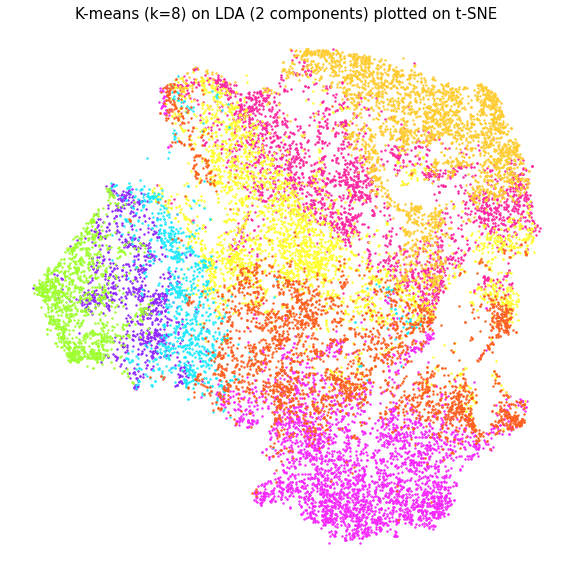

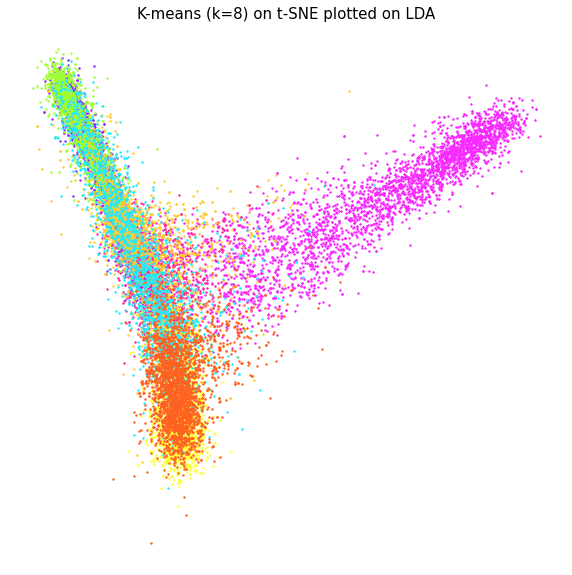

In [52]:
# Lets plot LDA clustering on t-SNE and vice versa

kMeansPlotSingle(tsne_coords,LDA_coords,8,2,'LDA','K-means (k=8) on LDA (7 components) plotted on t-SNE')
kMeansPlotSingle(tsne_coords,LDA_coords2,8,2,'LDA','K-means (k=8) on LDA (2 components) plotted on t-SNE')
kMeansPlotSingle(LDA_coords,tsne_coords,8,7,'LDA','K-means (k=8) on t-SNE plotted on LDA')

[ 0 -1  3 ...  0  0 -1]
number of clusters:  13


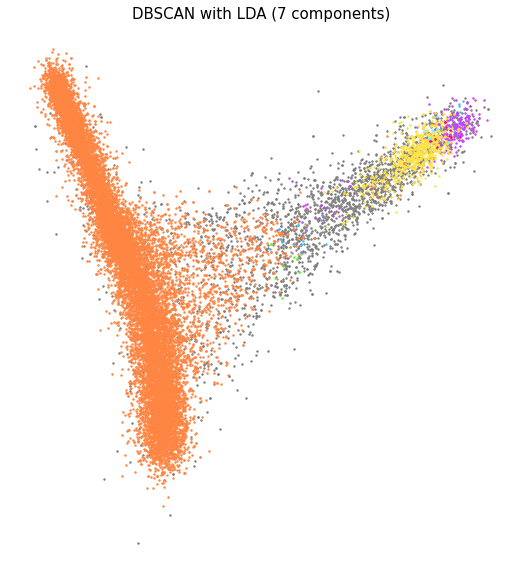

In [70]:
# DBSCAN with LDA on LDA

LDA_db = DBSCAN(eps=1,min_samples=10).fit_predict(LDA_coords)
print(LDA_db)
num_clusters = len(np.unique(LDA_db))
print("number of clusters: ",num_clusters)


plt.figure(figsize = (20,10))
colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
plt.subplot(1,2,1)
plt.scatter(LDA_coords[LDA_db == -1, 0],LDA_coords[LDA_db == -1, 1],c="grey",s=2)
for i in range(num_clusters):
    i_color = i % 8
    plt.scatter(LDA_coords[LDA_db == i, 0],LDA_coords[LDA_db == i, 1],c=colors[i_color],s=2)

        

plt.title("DBSCAN with LDA (7 components)",fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]
plt.show()


[ 0 -1  3 ...  0  0 -1]
number of clusters:  13


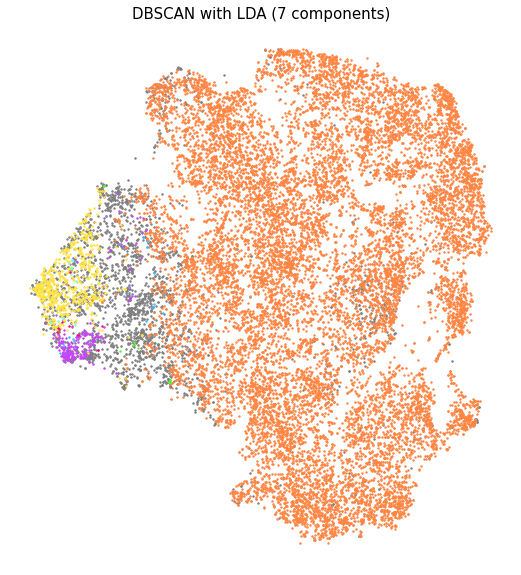

In [77]:
# DBSCAN with LDA on tsne

LDA_db = DBSCAN(eps=1,min_samples=10).fit_predict(LDA_coords)
print(LDA_db)
num_clusters = len(np.unique(LDA_db))
print("number of clusters: ",num_clusters)


plt.figure(figsize = (20,10))
colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
plt.subplot(1,2,1)
plt.scatter(tsne_coords[LDA_db == -1, 0],tsne_coords[LDA_db == -1, 1],c="gray",s=2)
for i in range(num_clusters):
    i_color = i % 8
    plt.scatter(tsne_coords[LDA_db == i, 0],tsne_coords[LDA_db == i, 1],c=colors[i_color],s=2)

        

plt.title("DBSCAN with LDA (7 components)",fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]
plt.show()


In [78]:
# Save dbscan data

# Save as numpy format
np.save('./LDA_db',LDA_db)

So, basically all of this exploration has told me - LDA is a superb dim reduction algorithm. Running k means on top of it perfectly returns my sectioned data! However this is in some sense "unfair" because this requires me to know the classes apriori. LDA really is a classifier. So, what I can do instead is to basically make LDA how I visualize all of my data? It's tough though because the clusters are so tight. Maybe can find a way around this.

## PCA exploration

In [79]:
# Creating PCA coords

pca_coords_2 = PCA(n_components=2).fit_transform(X)
pca_coords_7 = PCA(n_components=7).fit_transform(X)
pca_coords_20 = PCA(n_components=20).fit_transform(X)



In [ ]:
# # finding outlier
# print(np.argmax(pca_coords_2[:,0]))
# print(gal_id[np.argmax(pca_coords_2[:,0])])
# print(gal_id)
# [print(colorby)]

[None, None, None, None]

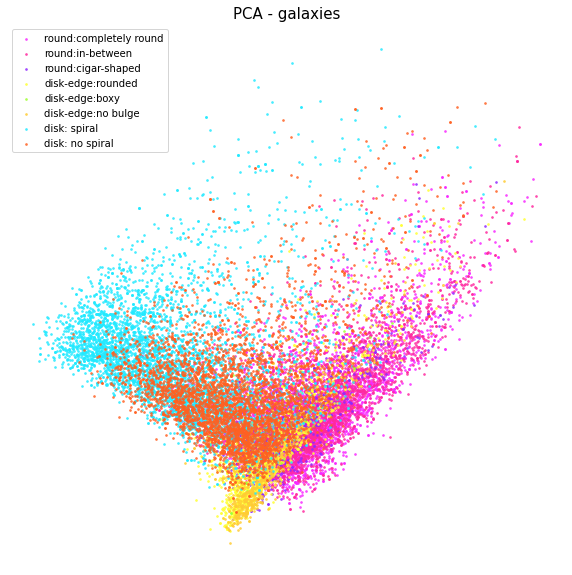

In [80]:
gal_classes = ['round:completely round','round:in-between','round:cigar-shaped', \
              'disk-edge:rounded','disk-edge:boxy','disk-edge:no bulge', \
              'disk: spiral','disk: no spiral']
# Original colors
# colorsG = ['#11ffeb','#ff4911','#ffbd7a', '#7a7aff', '#fd7aff', '#ffff7a']
# Colors based on larger categories - so related categories have similar colors
colorsG = ['#f829ff','#ff299f','#9029ff', '#ffff33', '#a0ff33', '#ffcc33','#22e9ff','#ff6122']

plt.figure(figsize = (10,10))
# plt.subplot(2,1,1)
for c, i, lab in zip(colorsG, [0, 1, 2, 3, 4, 5, 6, 7], gal_classes):
    plt.scatter(pca_coords_2[colorby==int(i),0], pca_coords_2[colorby==int(i),1], alpha=0.7, c=c, label=lab,s=3)
plt.legend()
plt.title('PCA - galaxies',fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]

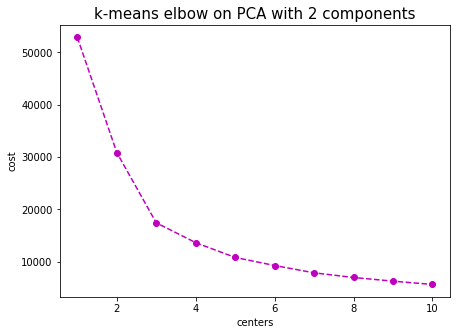

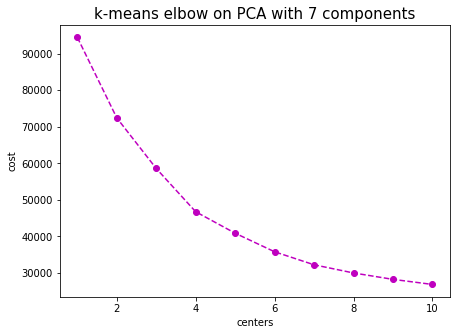

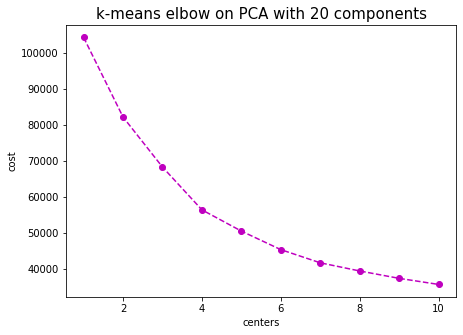

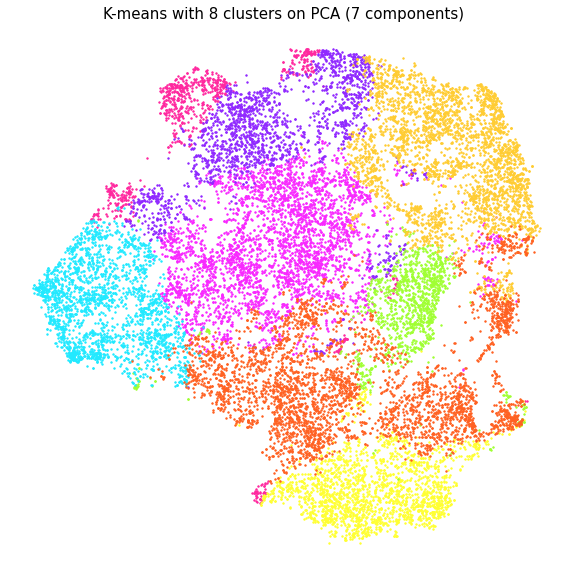

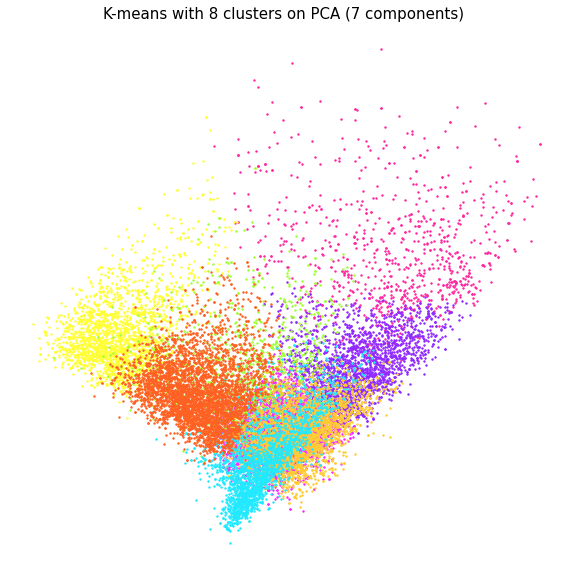

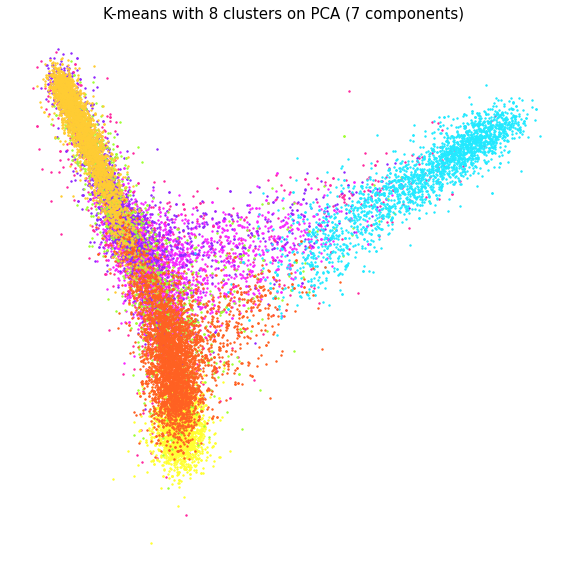

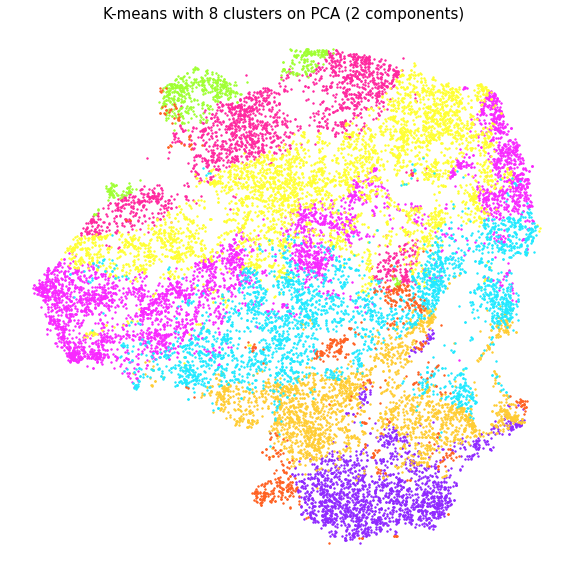

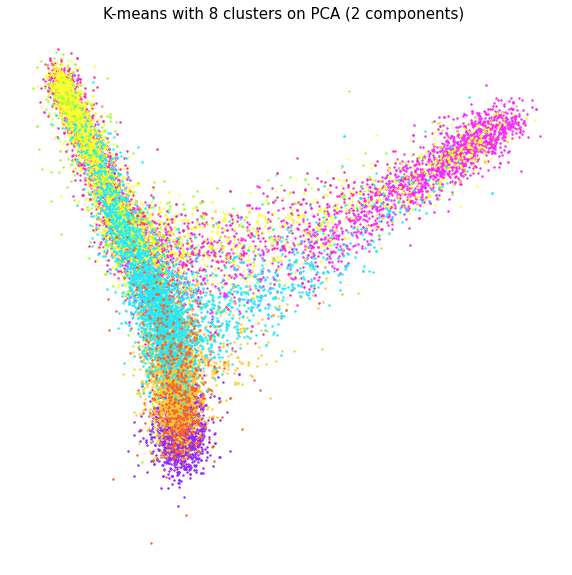

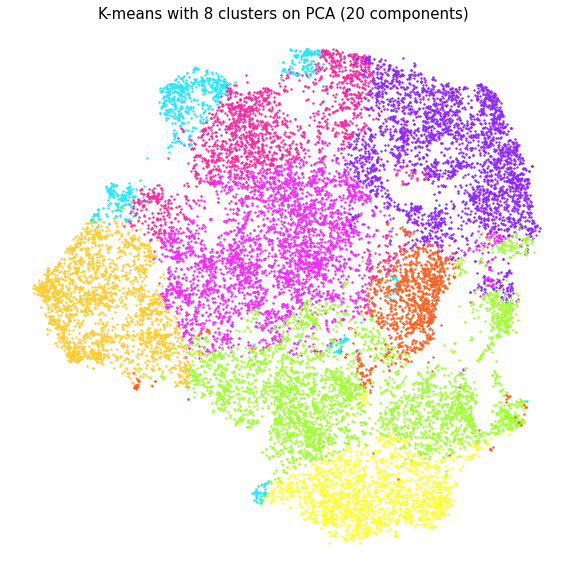

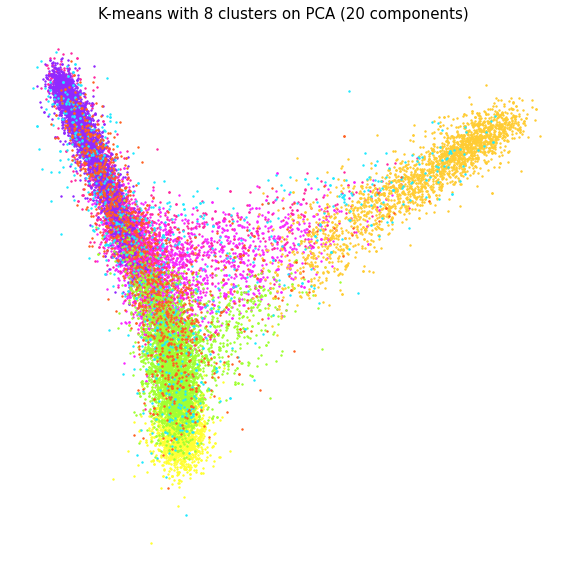

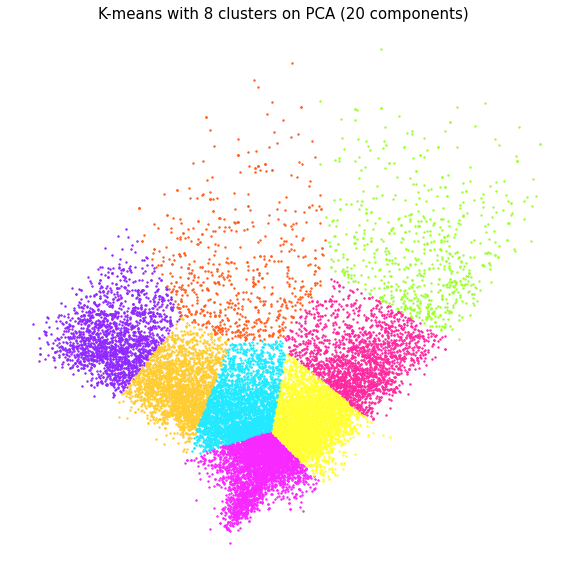

In [82]:

kmCost(pca_coords_2,2,'PCA')
kmCost(pca_coords_7,7,'PCA')
kmCost(pca_coords_20,20,'PCA')

kMeansPlotSingle(tsne_coords,pca_coords_7,8,7,'PCA (7 components)')
kMeansPlotSingle(pca_coords_7,pca_coords_7,8,7,'PCA (7 components)')
kMeansPlotSingle(LDA_coords,pca_coords_7,8,7,'PCA (7 components)')

kMeansPlotSingle(tsne_coords,pca_coords_2,8,2,'PCA (2 components)')
kMeansPlotSingle(LDA_coords,pca_coords_2,8,2,'PCA (2 components)')

kMeansPlotSingle(tsne_coords,pca_coords_20,8,20,'PCA (20 components)')
kMeansPlotSingle(LDA_coords,pca_coords_20,8,20,'PCA (20 components)')

kMeansPlotSingle(pca_coords_2,pca_coords_2,8,20,'PCA (2 components)')


Unfortunately t-SNE may be a better way to visualize the data just because LDA is too tight... not sure how to fix this, maybe make plot really big and also opacity small? IDK... ok calling matplotlib notebook lets you zoom in..... I think this will help 


ANYWAY,

strategy right now:

Dim reductions:
t-SNE (2 components) 
PCA (30 components)
UMAP (2, 30 components)
LDA - it's all the same

8 total dim reductions .. ... no

Clustering:
K-Means do elbow method on each above to determine optimum 3 k's to run
DBScan (?)


Ouputs:
t-SNE -> k-means 4,5,6 clusters + DBSCAN
PCA  -> k-means 4,5,6 clusters + DBSCAN
UMAP -> k-means 4,5,6 clusters + DBSCAN x2 (2,30 components)
LDA -> Maybe will be my primary viz technique? Can show that this basically perfectly clusters


Once I make the dim reduction coordinates, the clustering should go relatively quick

[-1  0  0 ...  0  0  0]
number of clusters:  19


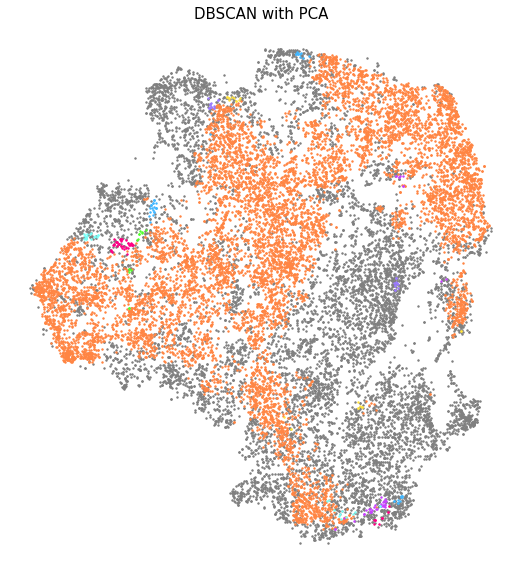

In [115]:
# DBSCAN with LDA on tsne

PCA_db = DBSCAN(eps=.35,min_samples=12).fit_predict(pca_coords_7)
print(PCA_db)
num_clusters = len(np.unique(PCA_db))
print("number of clusters: ",num_clusters)


plt.figure(figsize = (20,10))
colors = ['#ff8543','#43b7ff','#c743ff','#ffe343','#50ff2d','#79fff8','#ff0084','#9c7bff'];
plt.subplot(1,2,1)
plt.scatter(tsne_coords[PCA_db == -1, 0],tsne_coords[PCA_db == -1, 1],c="gray",s=2)
for i in range(num_clusters):
    i_color = i % 8
    plt.scatter(tsne_coords[PCA_db == i, 0],tsne_coords[PCA_db == i, 1],c=colors[i_color],s=2)

        

plt.title("DBSCAN with PCA",fontsize=15)
plt.axis("off")
[i.set_linewidth(0.4) for i in plt.gca().spines.values()]
plt.show()


In [116]:
# Saving PCA clustering data

# Save PCA clustering
PCA_k3 = clusterOut(pca_coords_7,3)
PCA_k4 = clusterOut(pca_coords_7,4)
PCA_k5 = clusterOut(pca_coords_7,5)
PCA_k6 = clusterOut(pca_coords_7,6)
PCA_k7 = clusterOut(pca_coords_7,7)
PCA_k8 = clusterOut(pca_coords_7,8)



# Save as numpy format
np.save('./PCA_k3',PCA_k3)
np.save('./PCA_k4',PCA_k4)
np.save('./PCA_k5',PCA_k5)
np.save('./PCA_k6',PCA_k6)
np.save('./PCA_k7',PCA_k7)
np.save('./PCA_k8',PCA_k8)

np.save('./PCA_db',PCA_db)

In [117]:
np.save('./PCA_coords',pca_coords_7)